# **Baysian and Gaussian Probability **

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns
sns.set_style("white")

import time

import scipy.stats 

## Problem:
Observe the code below. Draw the relationship between the parameter w changing from 0 to 1 and the correlation coefficient. Why does the curve look like that.<br>
The water level in a particular lake depends on two sources, direct rainfall $X$ and inflow from a stream $Y$. The rainfall $Z$ around the lake can be considered as a random variable
with a mean of $\mu_{z}$ and a standard deviation of $\sigma_{z}$. $X$ and $Y$ are related to $Z$ as 

$ X = a Z $

$ Y = b + c Z $

where a, b and c are constants . X and Y are functions of a random variable and are therefore also random. Calculate the correlation coefficient $\rho_{x,y}$ and simulate this situation in Python by modifying the code below.




Solve:$$ $$
I will test on $w$ with 0.001 step size, here is the code: 

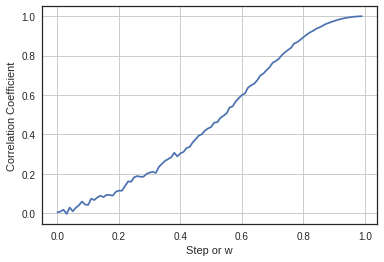

In [2]:
from pylab import plot, show, axis, subplot, xlabel, ylabel, grid
from scipy import stats

n = 10000
w=np.arange(0,1,0.01)
s1 = np.random.normal(0,1,n)
R1=[]

for i in w:
    s2 = i * s1 + (1 - i) * np.random.normal(0,2,n)
    r1 = np.mean(((s1 - np.mean(s1)) / np.std(s1, ddof=1)) * ((s2 - np.mean(s2)) / np.std(s2, ddof=1)))
    r2 = np.mean(stats.zscore(s1) * stats.zscore(s2))
    r3, p3 = stats.pearsonr(s1, s2)
    R1.append(r1)

plt.plot(w,R1)
ylabel('Correlation Coefficient')
xlabel('Step or w')
grid(True)
plt.show()

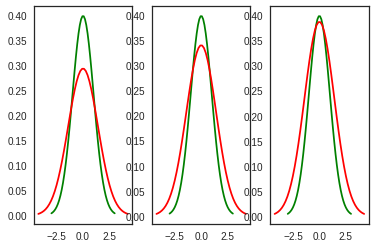

In [3]:
import math
w=[0.1,0.5,0.9]
u=0
sig1=math.sqrt(1)
sig2=math.sqrt(2)
x1=np.linspace(u-3*sig1,u+3*sig1,50)
x2=np.linspace(u-3*sig2,u+3*sig2,50)
s1=np.exp(-(x1-u)**2/(2*sig1**2))/(math.sqrt(2*math.pi)*sig1)
y=np.exp(-(x2-u)**2/(2*sig2**2))/(math.sqrt(2*math.pi)*sig2)

w=0.1
s2=w*s1+(1-w)*y
subplot(1,3,1)
plt.plot(x1,s1,'g-')
plt.plot(x2,s2,'r-')
w=0.5
s2=w*s1+(1-w)*y
subplot(1,3,2)
plt.plot(x1,s1,'g-')
plt.plot(x2,s2,'r-')
w=0.9
s2=w*s1+(1-w)*y
subplot(1,3,3)
plt.plot(x1,s1,'g-')
plt.plot(x2,s2,'r-')

Here are the S1 and S2 distribution with w=0.1, 0.5, and 0.9 respectively.

More intuitive to see figures above. The correlation curve is increasing in terms of the w. S1 is normal distributed with $\mu_1=0, \sigma_1=1$, and S2 is distributed with a normal distribution: $\mu_2=0$, $\sigma_2=1$ and $\sqrt(2)$ respectively.
with the w increasing from 0 to 1, the normal distribution with $\sigma_2=\sqrt(2)$ is "shrinking", while the normal distribution with $\sigma_2=1$ become dominant. THerefore, the correlation coefficience value will explained as the association between two distribution, which is up to 1 at the end of the loop.

Python simulation, where we assume: $\mu_z=2$, and $\sigma_z^2=6$. For $a=2$, $b=0.5$, and $c=1.2$.

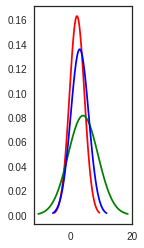

In [4]:

a=2
b=0.5
c=1.2

uz = 2
sz=math.sqrt(6)
dz=np.linspace(uz-3*sz,uz+3*sz,50)
ndz=np.exp(-(dz-uz)**2/(2*sz**2))/(math.sqrt(2*math.pi)*sz)

ux = a*uz
sx = a*sz
dx=np.linspace(ux-3*sx,ux+3*sx,50)
ndx=np.exp(-(dx-ux)**2/(2*sx**2))/(math.sqrt(2*math.pi)*sx)

uy = c*uz+b
sy = c*sz
dy=np.linspace(uy-3*sy,uy+3*sy,50)
ndy=np.exp(-(dy-uy)**2/(2*sy**2))/(math.sqrt(2*math.pi)*sy)

subplot(1,3,1)
plt.plot(dz,ndz,'r')
plt.plot(dx,ndx,'g')
plt.plot(dy,ndy,'b')


where the red, green, blue line represents $Z$, $X$ and $Y$ distribution. $$ $$

## Problem:
Normal probability calculation: Let X and Y be normal random variables, with $X\sim N(0,1)$ and $Y\sim N(1,4)$. <br>
(a) Find $P(X\leq1.5)$ and $P(X\leq -1)$ (exactly in terms of cumulative density function $\phi$, and in Python).<br>
(b) What is the distribution of $Y-12$? Generate 1000 random numbers in Python of $Y$ and then compute $Y-12$ for each of them and draw histogram. What are the properties of the new distribution what you can observe from the histogram. Please start with the code given below.<br>
(c) Find $P(-1\leq Y\leq 1)$.<br>



Solve:
$$ $$
(a) $P(X\leq1.5)$ in PDF can be expressed as $\phi(X=1.5)$ in CDF; $$ $$ $P(X\leq-1)$ in PDF can be expressed as $\phi(X=-1)$. $$ $$ These are going to be computed in Python code($X$~$N(0,1)$):

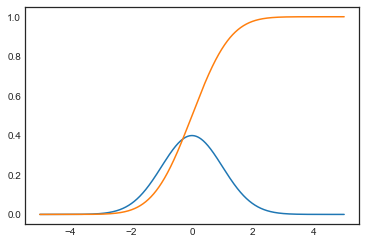

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

mean=0
std=math.sqrt(1)

x=stats.norm(loc=mean,scale=std)
t=np.linspace(mean-5*std,mean+5*std,10000)

plt.plot(t,x.pdf(t))
plt.plot(t,x.cdf(t))

In [9]:
print (x.cdf(1.5))
print (x.cdf(-1))

0.9331927987311419
0.15865525393145707


Therefore, $P(x\leq1.5)=0.93$, and $P(x\leq-1)=0.16$.

$$ $$
(b) For $Y$~$N$(1,4), and I simulate the $(Y-12)$ in following codes:

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


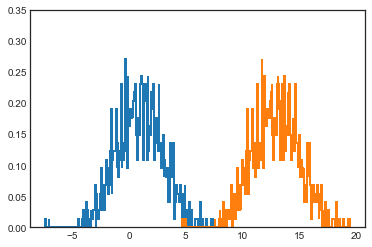

mean = 12.97
std  = 2.04


In [10]:
def f(x):
    return x + 12

mean = 1
std = math.sqrt(4)
data = np.random.normal(loc=mean, scale=std, size=1000)

d_t = f(data) # transform data through f(x)

plt.hist(data, bins=200, normed=True, histtype='step', lw=2)
plt.hist(d_t, bins=200, normed=True, histtype='step', lw=2)

plt.ylim(0, .35)
plt.show()
print('mean = {:.2f}'.format(d_t.mean()))
print('std  = {:.2f}'.format(d_t.std()))

So we can observe that the distribution of $(Y-12)$ is the right shift with $12$ units of that in $Y$.

$$ $$
(3) $Y$~$N(1,4)$, so $P(-1\leq{y}\leq1)$ can be expressed as $\phi(y=1)-\phi(y=-1)$:

In [11]:
mean=1
std=math.sqrt(4)

y=stats.norm(loc=mean,scale=std)
t=np.linspace(mean-5*std,mean+5*std,10000)
par=y.cdf(1)-y.cdf(-1)
print("%.2f" % par)

0.34


Therefore, $P(-1\leq{y}\leq1)=0.34$.
$$ $$

## Problem:
Let X and Y be normal random variables, with X∼N(0,1) and Y∼N(1,4). Please confirm using simulations (by generating 10,000 numbers) the following formulas: <br>
a) The product of two independent Gaussians is given by:

$$\begin{aligned}\mu &=\frac{\sigma_1^2\mu_2 + \sigma_2^2\mu_1}{\sigma_1^2+\sigma_2^2}\\
\sigma^2 &=\frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2} 
\end{aligned}$$

b) The sum of two Gaussians is given by

$$\begin{gathered}\mu = \mu_1 + \mu_2 \\
\sigma^2 = \sigma^2_1 + \sigma^2_2
\end{gathered}$$

The code should include the following:
- Generation of Gaussian random numbers as in the example from Problem.
- Computation of the mean and variance using formulas given above
- Extracting mean and variance from your histogram and comparisson with the results obtained from the formulas given above

Mean(Mul) = 0.04
STD(Mul)  = 2.23


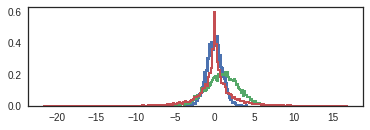

Mean(Sum) = 0.98
STD(Sum)  = 2.27


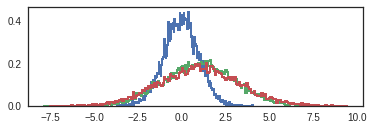

In [10]:
u_x = 0
u_y = 1
s_x = 1
s_y = 2
data_x= np.random.normal(loc=u_x, scale=s_x, size=10000)
data_y= np.random.normal(loc=u_y, scale=s_y, size=10000)

data1=data_x*data_y
data2=data_x+data_y

print('Mean(Mul) = {:.2f}'.format(data1.mean()))
print('STD(Mul)  = {:.2f}'.format(data1.std()))

subplot(2,1,1)
plt.hist(data_x, bins=200, normed=True, histtype='step', lw=2)
plt.hist(data_y, bins=200, normed=True, histtype='step', lw=2)
plt.hist(data1, bins=200, normed=True, histtype='step', lw=2)
plt.show()

print('Mean(Sum) = {:.2f}'.format(data2.mean()))
print('STD(Sum)  = {:.2f}'.format(data2.std()))

subplot(2,1,2)
plt.hist(data_x, bins=200, normed=True, histtype='step', lw=2)
plt.hist(data_y, bins=200, normed=True, histtype='step', lw=2)
plt.hist(data2, bins=200, normed=True, histtype='step', lw=2)
plt.show()

In [11]:
mu1=0
mu2=1
var1=1
var2=4
Mean_Mul=(var1*mu2+var2*mu1)/(var1+var2)
var_Mul=(var1*var2)/(var1+var2)
Std_Mul=math.sqrt(var_Mul)

Mean_sum=mu1+mu2
var_Sum=var1+var2
Std_Sum=math.sqrt(var_Sum)

print("Mean for mutiply by formula: ","%.2f" %Mean_Mul)
print("STD for mutiply by formula:","%.2f" %Std_Mul)
print("Mean for sum by formula: ","%.2f" %Mean_sum)
print("STD for sum by formula: ","%.2f" %Std_Sum)

Mean for mutiply by formula:  0.20
STD for mutiply by formula: 0.89
Mean for sum by formula:  1.00
STD for sum by formula:  2.24


## Problem:
Let us consider a model where $x = x_t +e_x$, where $e_x$ is a random error
term (i.e. has mean 0 and variance 1). That is, $x_t$ is the “true” value of the variable, and $x$ is the measure of the variable that is observed. The same model is used for the measurement of y, $y=y_t+e_y$, where $e_y$  is a random error term (i.e. has mean 0 and variance 1). 

A) Create data in Python (1000 points of x and y) that has the following properties
$$\Sigma = \begin{bmatrix}2&0.7\\0.7&\sqrt(8)\end{bmatrix}$$
$mean_x = 10$, $mean_y=7$, both $e_x$ and $e_y$ are standard Normal.
using: $y= y_t + e_y$ and $x = x_t + e_x$.

B) Compute mean and variance of x and y. What is the effect of the error term on the mean and variance of x and y.

C) Compute the following covariances in Python: $cov (x, y_t)$ and $cov (x_t, y_t)$. From the lecture, you know how to compute, for example, $cov(x_t + e_x, y_t)$. Compare obtained result with the formulas from the lectures.

D) Find the correlation coeficient in Python.



(a) Generate the data of Gaussian distributions:

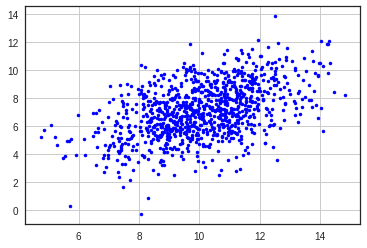

In [12]:
from numpy import *

errx= np.random.normal(loc=0, scale=1, size=1000)
erry= np.random.normal(loc=0, scale=1, size=1000)

mean=[10,7]
cov=([2,0.7],[0.7,np.sqrt(8)])
xt,yt=random.multivariate_normal(mean,cov,1000).T

x=xt+errx
y=yt+errx

plt.plot(x,y,'b.')
grid(True)

(b) Compute the mean and variance of $x$ and $y$:

In [13]:
print("Mean of x: ","%.2f" % np.mean(x))
print("Var of x: ","%.2f" % np.std(x)**2)
print("Mean of y: ","%.2f" % np.mean(y))
print("Var of y: ","%.2f" % np.std(y)**2)

Mean of x:  10.07
Var of x:  2.90
Mean of y:  7.09
Var of y:  3.74


For $x$: $\mu_x$ is 10.07 while the mean of true is 10, $\sigma_x^2$ is 2.90 while the Std of ture is $2$;$$ $$
For $y$: $\mu_y$ is 7.09 while the mean of true is 7, $\sigma_y^2$ is 3.74 while the Std of ture is $\sqrt8$; $$ $$ The error part slightly interfered with the mean, but affects the variance to some degree.

(c) $Cov(x,y_t)$ and $Cov(x_t,y_t)$:

In [14]:
print(np.cov(x,yt))
print(np.cov(xt,yt))

[[ 2.90784104  0.62642863]
 [ 0.62642863  2.74398427]]
[[ 1.97143414  0.62603485]
 [ 0.62603485  2.74398427]]


(d) Note that the $C_{0,1}$ element in the covariance matrix shows the correlation.$$ $$
Thus, from previously computed covariance matric:$$ $$
Correlation efficience between $x$ and $y_t$ is 0.626, while that between $x_t$ and $y_t$ is 0.626.

## Problem: 
Implement the following problem in Python by simulating multivariate normal and solve analytically. To generate multivariate Gaussian random numbers, use the code below from http://scipy-cookbook.readthedocs.io/items/CorrelatedRandomSamples.html

 Let $X=(X_1,X_2,X_3)^T$ have a N(µ, Σ) distribution where $µ = (0, 0, 0)^T$ and
$$\Sigma = \begin{bmatrix}1&-2&0\\-2&5&0\\0&0&2\end{bmatrix}$$

Find the joint distribution of the following pairs of random variables. Are they independently distributed? Provide explanations for your answers.$$ $$
(i) $X_1$ and $X_2$. <br>
(ii) $X_2$ and $X_3$. <br>
(iii) ($X_1$, $X_2$) and $X_3$. <br>
(iv) ($X_1$ + $X_2$)/2 and $X_3$. <br>
(v) $X_2$ and $-2.5X_1 + X_2 - X_3$. <br>

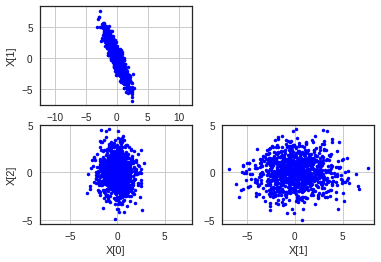

In [21]:
import numpy as np
from scipy.linalg import eigh, cholesky
from scipy.stats import norm
from pylab import plot, show, axis, subplot, xlabel, ylabel, grid

method = 'cholesky'
num_samples = 1000

r = np.array([
        [  1, -2, 0],
        [ -2,  5, 0],
        [  0,  0, 2]
    ])

x = norm.rvs(size=(3, num_samples))

if method == 'cholesky':
    c = cholesky(r, lower=True)
else:
    evals, evecs = eigh(r)
    c = np.dot(evecs, np.diag(np.sqrt(evals)))
 
X = np.dot(c, x)

subplot(2,2,1)
plot(X[0], X[1], 'b.')
ylabel('X[1]')
axis('equal')
grid(True)

subplot(2,2,3)
plot(X[0], X[2], 'b.')
xlabel('X[0]')
ylabel('X[2]')
axis('equal')
grid(True)

subplot(2,2,4)
plot(X[1], X[2], 'b.')
xlabel('X[1]')
axis('equal')
grid(True)

show()

(i) In the covariance matrix: $$\Sigma = \begin{bmatrix}\sigma_{X1,X1}^2&Cov_{(X_1,X_2)}&Cov_{(X_1,X_3)}\\Cov_{(X_2,X_1)}&\sigma_{X2,X2}^2&Cov_{(X_2,X_3)}\\Cov_{(X_3,X_1)}&Cov_{(X_3,X_2)}&\sigma_{X3,X3}^2\end{bmatrix}$$ $$ $$

In [16]:
print(np.cov(X[0],X[1]))

[[ 0.97606882 -1.93846025]
 [-1.93846025  4.82180005]]


where $Cov_{(X_1,X_2)}=-1.93\neq0$, so $X_1$ is correlated with $X_2$ $$ $$
$$ $$
(ii) $Cov_{(X_2,X_3)}=0$:

In [17]:
print(np.cov(X[1],X[2]))

[[ 4.82180005 -0.08903061]
 [-0.08903061  2.02332666]]


so $X_2$ is independent with $X_3$

$$ $$
(iii) $Cov_{([X_1,X_2],X_3)}$:

In [18]:
print(np.cov([X[0],X[1]],X[2]))


[[ 0.97606882 -1.93846025 -0.00542899]
 [-1.93846025  4.82180005 -0.08903061]
 [-0.00542899 -0.08903061  2.02332666]]


$$ $$
(iv) ($X_1$ + $X_2$)/2 and $X_3$:

In [19]:
tem=(X[0]+X[1])/2
print(np.cov(tem,X[2]))

[[ 0.48023709 -0.0472298 ]
 [-0.0472298   2.02332666]]


where the covariance is -0.05, which we coould say that the $(X_1+X_2)/2$ is independent with $X_3$

$$ $$
(v) $X_2$ and $-2.5X_1 + X_2 - X_3$:

In [20]:
tem=(-2.5*X[0]+X[1]-X[2])
print(np.cov(tem,X[1]))

[[ 22.78877436   9.7569813 ]
 [  9.7569813    4.82180005]]


where the covariance is 9.75, so $X_2$ correlated with $(-2.5X_1 + X_2 - X_3)$: